# Data Pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
x = dataset.iloc[:, :-1].values
approved = dataset.iloc[:, -1].values #1 or 0 - approved or not

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) #Normalize
x = sc.fit_transform(x)

# Train SOM

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data = x)
som.train_random(data = x, num_iteration = 100)

# Visualize Results

Red circle means no approval, green square means approved

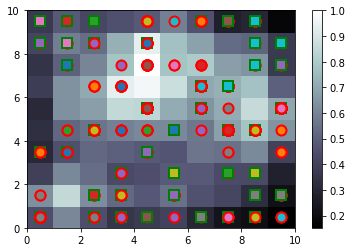

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
#build map
bone()
pcolor(som.distance_map())
colorbar()
markers = ['o', 's']
marker_colors = ['r', 'g']
for i, entity in enumerate(x):
    w = som.winner(entity)
    plot(w[0]+0.5, w[1]+0.5, markers[approved[i]], markeredgecolor = marker_colors[approved[i]], markerfacecolor=None, markersize=10, markeredgewidth = 2)
show()

# Finding the Frauds

In [11]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(4, 7)], mappings[(4, 9)]), axis=0)

In [12]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5655658e+07, 1.0000000e+00, 2.2580000e+01, 1.5000000e+00,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.4000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 6.8000000e+01],
       [1.5596165e+07, 1.0000000e+00, 4.0920000e+01, 5.0000000e-01,
        1.0000000e+00, 7.0000000e+00, 4.0000000e+00, 5.0000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.3000000e+02, 1.0000000e+00],
       [1.5690153e+07, 1.0000000e+00, 3.4000000e+01, 5.5000000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 6.0000000e+01, 1.0000000e+00],
       [1.5631451e+07, 1.0000000e+00, 2.4500000e+01, 1.3335000e+01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,